# Визуализации. Библиотека Seaborn

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Признаки по-одному

### 1.1 Количественные

#### histplot и kdeplot

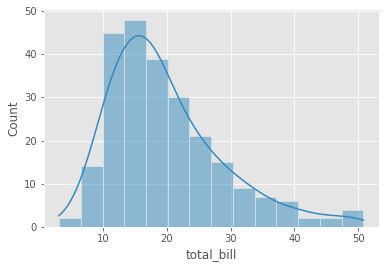

In [3]:
# Histplot с параметром kde=True показывает гистограмму и график плотности распределения.
sns.histplot(tips['total_bill'], kde = True)

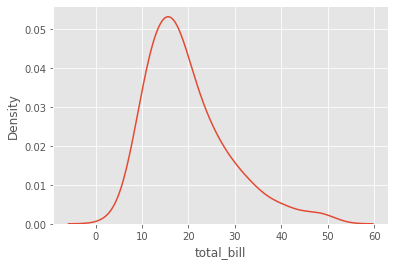

In [4]:
# Можем посмотреть только на плотность, используя график kdeplot
sns.kdeplot(tips['total_bill'])

#### rugplot

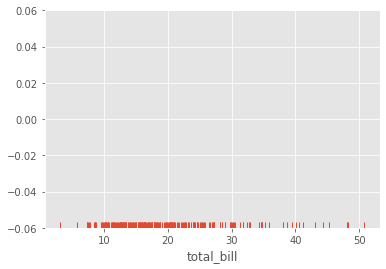

In [5]:
# Rugplot показывает то же, что и график плотности распределения, только в одномерной форме. 
# Чем плотнее расположены линии, тем выше плотность.
sns.rugplot(tips['total_bill'])

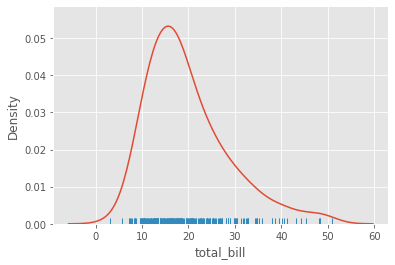

In [6]:
# Для наглядности, rugplot часто бывает полезным использовать с другими типами графиков.
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

#### boxplot

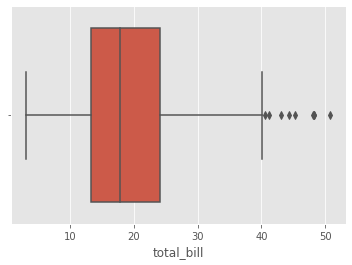

In [7]:
sns.boxplot(tips['total_bill'])

### 1.2 Категориальные

#### countplot

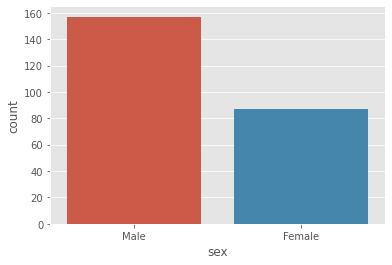

In [8]:
# Считаем количество значений в каждой категории.
sns.countplot(x = 'sex', data = tips)

## 2. Взаимодействие признаков

### 2.1 Количественный с количественным

####kdeplot

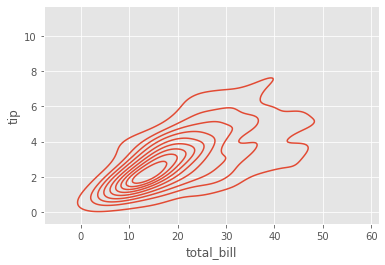

In [9]:
sns.kdeplot(tips['total_bill'], tips['tip'])

#### jointplot

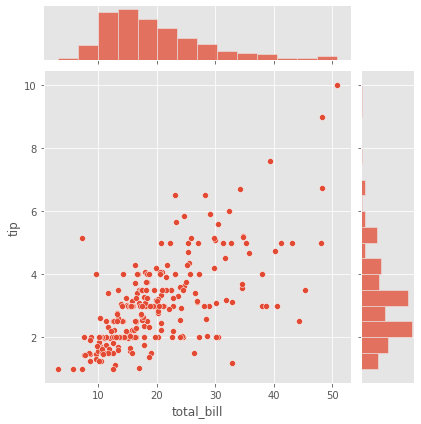

In [10]:
# Jointplot показывает совместное распределение по двум переменным. 
# Параметр kind может принимать следующие значения (scatter, reg, resid, kde, hex).
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter')

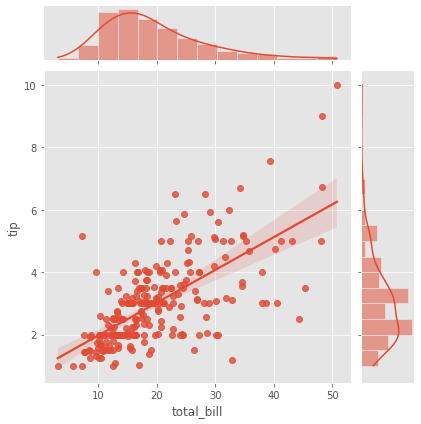

In [11]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

### 2.2 Количественный с категориальным

#### barplot

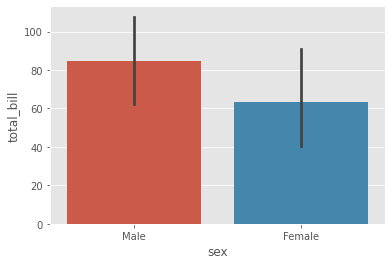

In [12]:
# Barplot агрегирует данные по значениям категориальной переменной и 
# применяет определенную функцию к значениям соответствующих групп количественной переменной. 
# По умолчанию эта функция - среднее, однако ее можно изменить в параметре estimator.
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.var)

#### boxplot

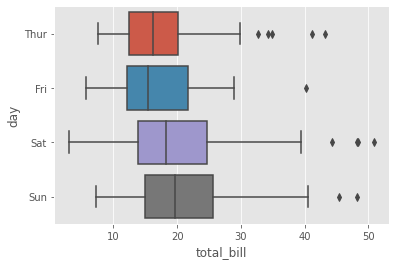

In [13]:
sns.boxplot(x = 'total_bill', y = 'day', data = tips, orient = 'h')

#### violinplot

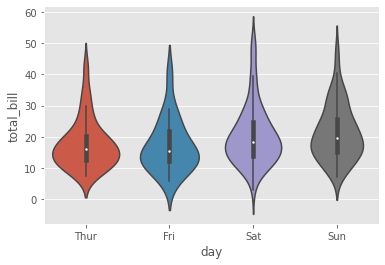

In [14]:
# Выполняет ту же функцию, что и boxplot. 
# По сути это два повернутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом, 
# в результате чего получается что-то похожее на виолончель, откуда и название.
sns.violinplot(x = 'day', y = 'total_bill', data = tips)

#### stripplot и swarmplot

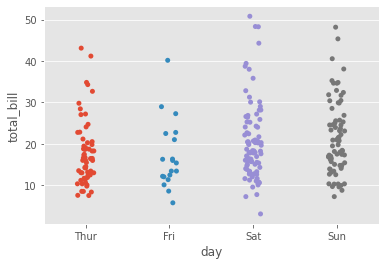

In [15]:
# Stripplot рисует диаграмму рассеивания, состоящую из одной категориальной переменной.
sns.stripplot(data = tips, x = 'day', y = 'total_bill')

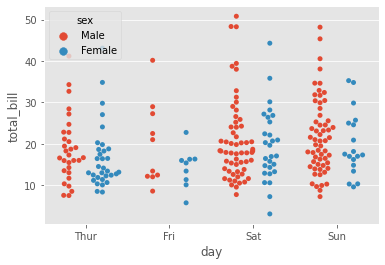

In [16]:
# Swarmplot показывает ровно то же самое, только точки не накладываются друг на друга.
sns.swarmplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', dodge = True)

### 2.3 Комбинации всех признаков в выборке

#### pairplot

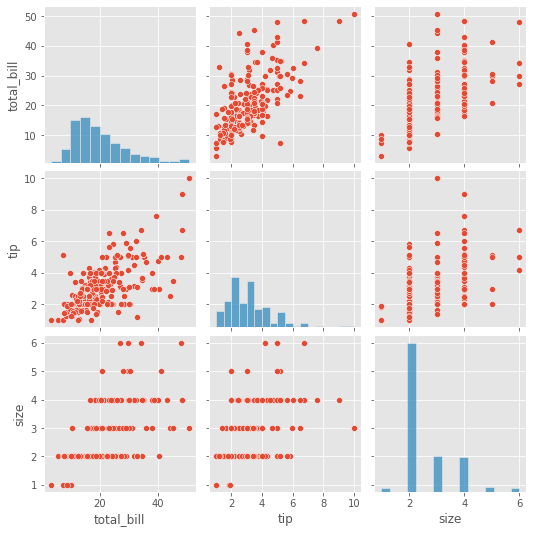

In [17]:
# Pairplot показывает отношение между всеми парами переменных. 
# На диагонали находятся гистограммы, а на других местах - диаграммы рассеивания.
sns.pairplot(tips)

#### PairGrid

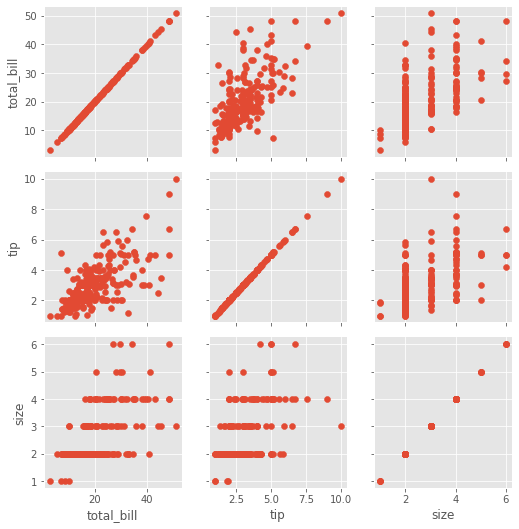

In [18]:
# PairGrid это более расширенная функция, позволяющая показывать отношения между всеми парами параметров по различным функциям. 
# По сути pairplot является ее частным случаем.
g = sns.PairGrid(tips)
g.map(plt.scatter)

### 2.4 Количественный и несколько категориальных

#### FacetGrid

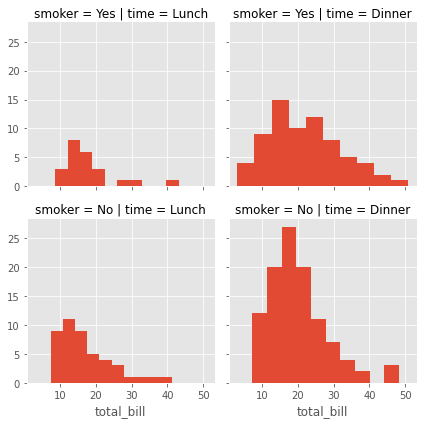

In [19]:
# FacetGrid позволяет визуализировать совместное распределение отдельных признаков нескольких переменных.
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');
g = g.map(plt.hist, 'total_bill')

## 3. Матричные графики

#### heatmap

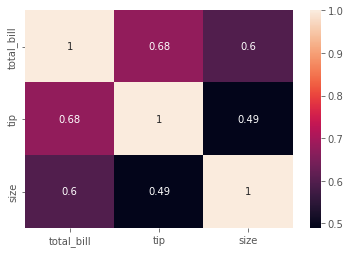

In [20]:
sns.heatmap(tips.corr(), annot = True)

In [21]:
flights = sns.load_dataset('flights')

In [22]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
# Сводная таблица (количество пассажиров помесячно с 1949 по 1960 гг).
pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')
print(pvflights)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

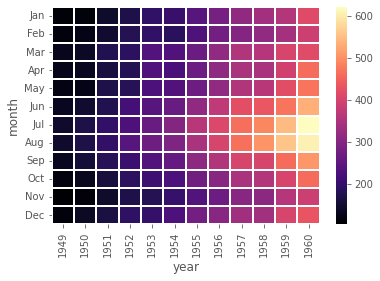

In [24]:
sns.heatmap(pvflights, linecolor = 'white', linewidths = 1, cmap = 'magma')

#### clustermap

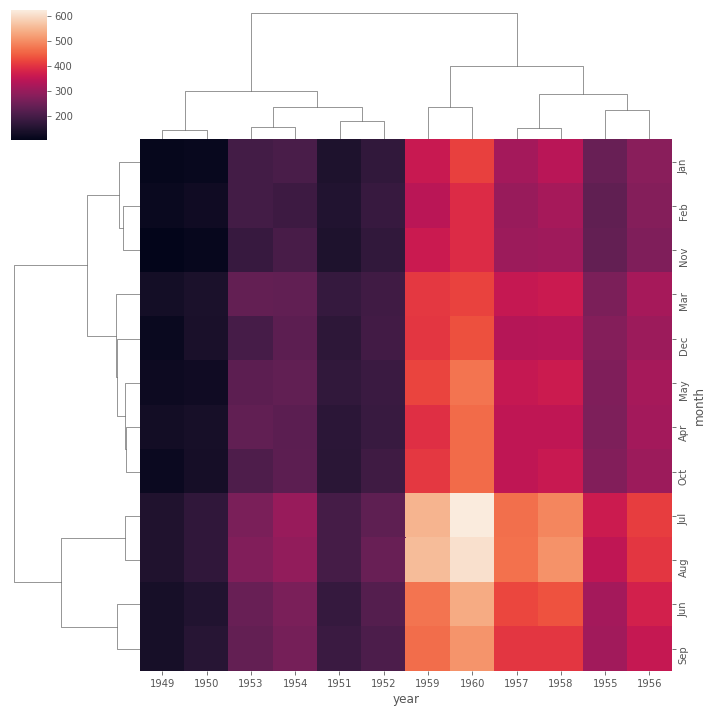

In [25]:
sns.clustermap(pvflights)